# All material ©2019, Alex Siegman


---

### There is a LOT of useful information onthe internet, and as data scientists you'll often need access to that information. 

### Unfortunatley, rarely is that information contained neatly in CSVs or even in tabular form. Rather, you have to really work to get what you need. 

### Lucky for us, there are some useful tools for "scraping" the web – in particular, one called BeautifulSoup (https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [12]:
import time
import re
import csv
import requests
from bs4 import BeautifulSoup
!pip install lxml

### Before we delve in, here's an example of the power of BeautifulSoup:

In [7]:
# the file attached is a simple csv containing 100 unique URLs from WSJ.com

url_list = [] # create an empty list called 'url_list' where we will store all of the URL's in question

word_count_list = [] # create an empty list called 'word_count_list' where we will store the word counts associated  
                     # with each URL in our 'url_list'

with open("URLS_for_WordCount.csv", newline='') as csvfile:
          # note that you will have to navigate to wherever it is you have stored your csv as a pathname
        
    reader = csv.DictReader(csvfile) # this allows us to map our information in each row to an OrderedDictionary 
                                     # for more on DictReader see https://docs.python.org/3/library/csv.html
    
    for row in reader: # for every row in our csv, aka, for every dictionary entry (which is composed of our URLs)...
        
        # NB: you can use "print(row)" here to see what our ordered dictionary looks like 
        
        for k, v in row.items(): # for every key, value pair in our ordered dictionary...
            
            # NB: again, you can use "print(k)" or "print(v)" here to see what our key, value pairs look like 

            url_list.append(str(v)) # add the URL to our "url_list"
            
            r = requests.get(v) # for more on the requests library check out this tutorial from RealPython: 
                                # https://realpython.com/python-requests/
            
            soup = BeautifulSoup(r.text,'html') # we are going to turn that URL into 'soup', aka, we are going to be 
                                                # able to see it's metadata For more on BeautifulSoup, check out: 
                                                # https://www.crummy.com/software/BeautifulSoup/bs4/doc/
            
            wc1 = str(soup.find("meta", property="article:word_count")) # we want to find the word_count associated 
                                                                        # with each URL, found in the HTML that we 
                                                                        # have just "souped"
            
            wc2 = re.search('\d+',wc1).group(0) # we use regular expressions to find the first number in the associated
            # metadata, and store that. For more on regex see this great tutorial (not from me): https://regexr.com/
        
            word_count_list.append(wc2) # finally, we add (append) our word count to our "word_count_list"
            
        break

print(word_count_list) # just to make sure everything works as planned
print(url_list) # again, just to make sure everything works as planned      

# the code below will create a new csv, called "URL_for_WordCount_with_WordCounts.csv" in our current directory"
# for more on csv.writer check out: https://docs.python.org/3/library/csv.html

""" 

myData = url_list,word_count_list 
myFile = open('URL_for_WordCount_with_WordCounts.csv', 'w')  
with myFile:  
   writer = csv.writer(myFile)
   writer.writerows(myData)

['397']
['https://www.wsj.com/articles/yellen-u-s-financial-system-is-safer-and-sounder-than-before-crisis-1498586028']


### Now, back to BeautifulSoup basics:


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="//style.sndcdn.com" rel="dns-prefetch"/>
  <link href="//a-v2.sndcdn.com" rel="dns-prefetch"/>
  <link href="//api-v2.soundcloud.com" rel="dns-prefetch"/>
  <link href="//sb.scorecardresearch.com" rel="dns-prefetch"/>
  <link href="//secure.quantserve.com" rel="dns-prefetch"/>
  <link href="//eventlogger.soundcloud.com" rel="dns-prefetch"/>
  <link href="//api.soundcloud.com" rel="dns-prefetch"/>
  <link href="//ssl.google-analytics.com" rel="dns-prefetch"/>
  <link href="//i1.sndcdn.com" rel="dns-prefetch"/>
  <link href="//i2.sndcdn.com" rel="dns-prefetch"/>
  <link href="//i3.sndcdn.com" rel="dns-prefetch"/>
  <link href="//i4.sndcdn.com" rel="dns-prefetch"/>
  <link href="//wis.sndcdn.com" rel="dns-prefetch"/>
  <link href="//va.sndcdn.com" rel="dns-prefetch"/>
  <link href="//pixel.quantserve.com" rel="dns-prefetch"/>
  <title>
   Sound
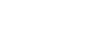
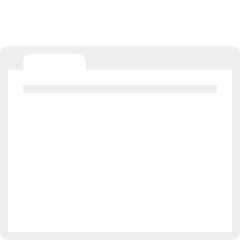

In [15]:
url = "https://soundcloud.com/" # a notoriously permeable site for scraping

r = requests.get(url)

soup = BeautifulSoup(r.text,'html')

print(soup.prettify())

In [16]:
soup.title

<title>SoundCloud â Listen to free music and podcasts on SoundCloud</title>

In [17]:
soup.title.name

'title'

In [18]:
soup.title.string

'SoundCloud â\x80\x93 Listen to free music and podcasts on SoundCloud'

In [19]:
soup.title.parent.name

'head'

In [20]:
soup.p

<p class="errorTitle">JavaScript is disabled</p>

In [21]:
soup.p['class']

['errorTitle']

In [22]:
soup.a

<a class="header__logoLink sc-border-box sc-ir" href="/" title="Home">SoundCloud</a>

In [23]:
soup.find_all('a')

[<a class="header__logoLink sc-border-box sc-ir" href="/" title="Home">SoundCloud</a>,
 <a class="sc-button sc-button-medium" href="http://www.enable-javascript.com/" target="_blank">Show me how to enable it</a>,
 <a href="https://help.soundcloud.com/hc/articles/115003564308-Technical-requirements">Need help?</a>,
 <a href="http://google.com/chrome" target="_blank" title="Chrome">Chrome</a>,
 <a href="http://firefox.com" target="_blank" title="Firefox">Firefox</a>,
 <a href="http://apple.com/safari" target="_blank" title="Safari">Safari</a>,
 <a href="http://windows.microsoft.com/ie" target="_blank" title="Internet Explorer">Internet Explorer</a>,
 <a class="sc-button" href="http://help.soundcloud.com" id="try-again" target="_blank">I need help</a>,
 <a href="/popular/searches" title="Popular searches">Popular searches</a>]

In [24]:
soup.find_all(id='link3')

[]

In [25]:
for link in soup.find_all('a'):
    print(link.get('href'))

/
http://www.enable-javascript.com/
https://help.soundcloud.com/hc/articles/115003564308-Technical-requirements
http://google.com/chrome
http://firefox.com
http://apple.com/safari
http://windows.microsoft.com/ie
http://help.soundcloud.com
/popular/searches





















SoundCloud â Listen to free music and podcasts on SoundCloud

























!function(){function o(o){return o.test(a)}function e(){var o,e=a.match(/(opera|chrome|safari|firefox|msie)\/?\s*(\.?\d+(\.\d+)*)/i);return e&&(o=a.match(/version\/([.\d]+)/i))?parseInt(o[1],10):e?parseInt(e[2],10):null}var a,r,n;a=window.navigator.userAgent.toLowerCase();var i,t="undefined"!=typeof window.opera&&"[object Opera]"===window.opera.toString(),s=a.match(/\sopr\/([0-9]+)\./),p=o(/chrome/),d=o(/webkit/),c=!p&&o(/safari/),f=!t&&o(/msie/),m=!d&&o(/gecko/);i=s?parseInt(s[1],10):e();var w=o(/mobile|android|iphone|ipod|symbianos|nokia|s60|playbook|playstation/);m&&(r=a.match(/(firefox)\/?\s*(\.?\d+(\.\d+)*)/i),n=r&&r.length>1&&parseInt(r[2],10)>=41),i&&!w&&(p&&!s&&i<40||m&&!s&&n===!1||c&&i<8||f&&i<11||t&&i<13||s&&i<27)&&(window.__sc_abortApp=!0)}();





.header{width:100%;height:46px}.header,.header__logo{background:#333}.header__logoLink{background:url() no-repeat 12px 11px
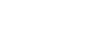
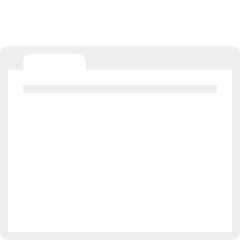

In [26]:
print(soup.get_text())

In [27]:
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/

# stopped at 'Kinds of objects'